In [1]:
from numqt import *

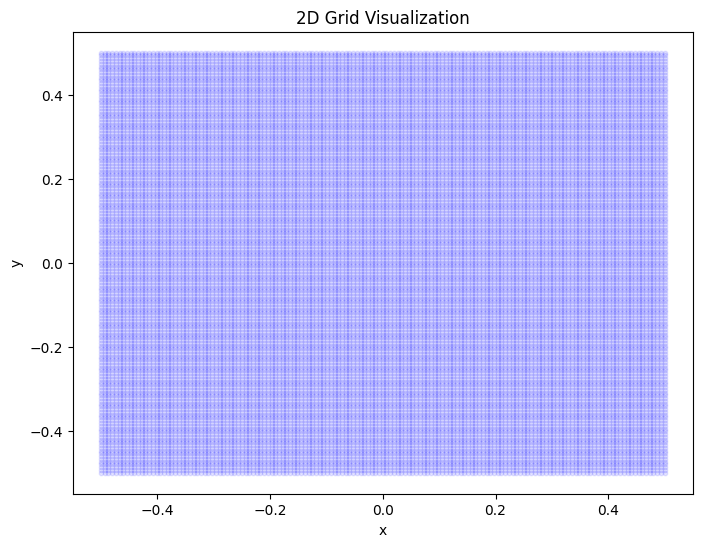

153 153


In [59]:
#-----------------------------------------------------------
# Characteristic lengths of the problem
#-----------------------------------------------------------
Lx = 1 # Confinement length along x
Ly = 1 # Confinement length along y

#-----------------------------------------------------------
# Problem's parameters
#-----------------------------------------------------------
hbar = 1
m = 1 # e-mass

#-----------------------------------------------------------
# Simulation parameters
#-----------------------------------------------------------
xbounds = (-Lx/2, Lx/2) # confinement length
ybounds = (-Ly/2, Ly/2) # confinement length

dx_max = 0.01 # Global maximum allowed spacing
dy_max = 0.01 # Global maximum allowed spacing

#-----------------------------------------------------------
# Creating grid
#-----------------------------------------------------------
mesh_obj = Mesh(dims=2,
                 xbounds=xbounds,
                 ybounds=ybounds,
                 dx_max=dx_max,
                 dy_max=dy_max,
                 dx_func = None,
                 dy_func= None,
                 dz_func= None,
                 max_iter= 10)

dimx = mesh_obj.Nx
dimy = mesh_obj.Ny
mesh_obj.visualize_grid(alpha = 0.1)
print(dimx, dimy)

In [60]:
#-----------------------------------------------------------
# Obtaining canonical operators
#-----------------------------------------------------------
operators = canonic_ops(mesh_obj, additional_subspaces = None, hbar=1)
px2 = operators.get_ops()["p2"][0]
py2 = operators.get_ops()["p2"][1]

#-----------------------------------------------------------
# Constructing the Hamiltonian
#-----------------------------------------------------------
H = Hamiltonian((px2 + py2) / (2*m), mesh_obj)

In [72]:
k = 100
energies, wavefunctions = H.solve(k)

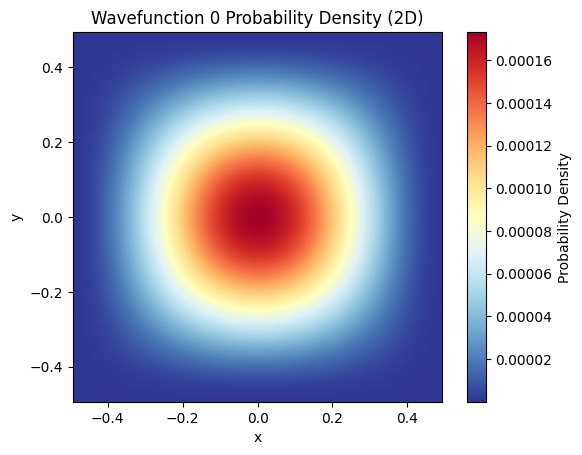

In [73]:
H.plot(0)

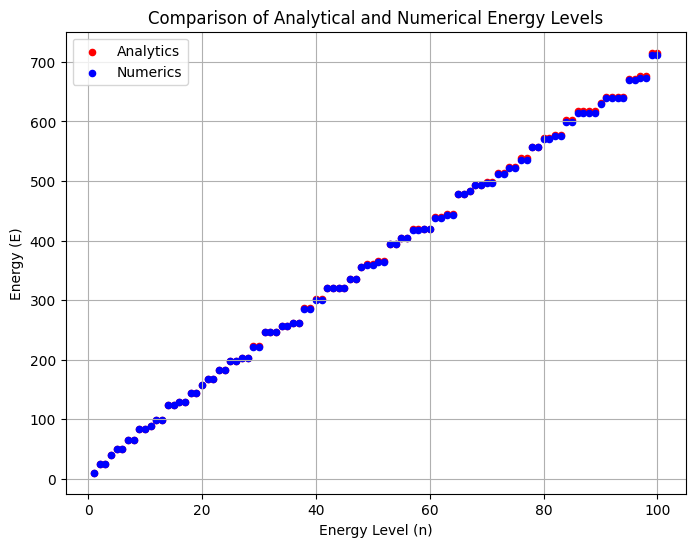

In [75]:
# Define the analytical energy function
def energy(nx, ny):
    return nx**2 * np.pi**2 * hbar**2  / (2 * m * Lx**2) + ny**2 * np.pi**2 * hbar**2  / (2 * m * Ly**2)

# Generate analytical energy levels
analytical_energies = sorted([energy(nx, ny) for nx in range(1, k+1) for ny in range(1, k+1)])[:k]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(range(1, k+1), analytical_energies, c="r", s=20, label="Analytics")
plt.scatter(range(1, k+1), energies, c="b", s=20, label="Numerics")
plt.legend()
plt.ylabel("Energy (E)")
plt.xlabel("Energy Level (n)")
plt.title("Comparison of Analytical and Numerical Energy Levels")
plt.grid(True)

plt.show()